# Description
A monthly analysis for Romanian power market, with hour averages for each month (Data source : Transelectrica)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import calendar

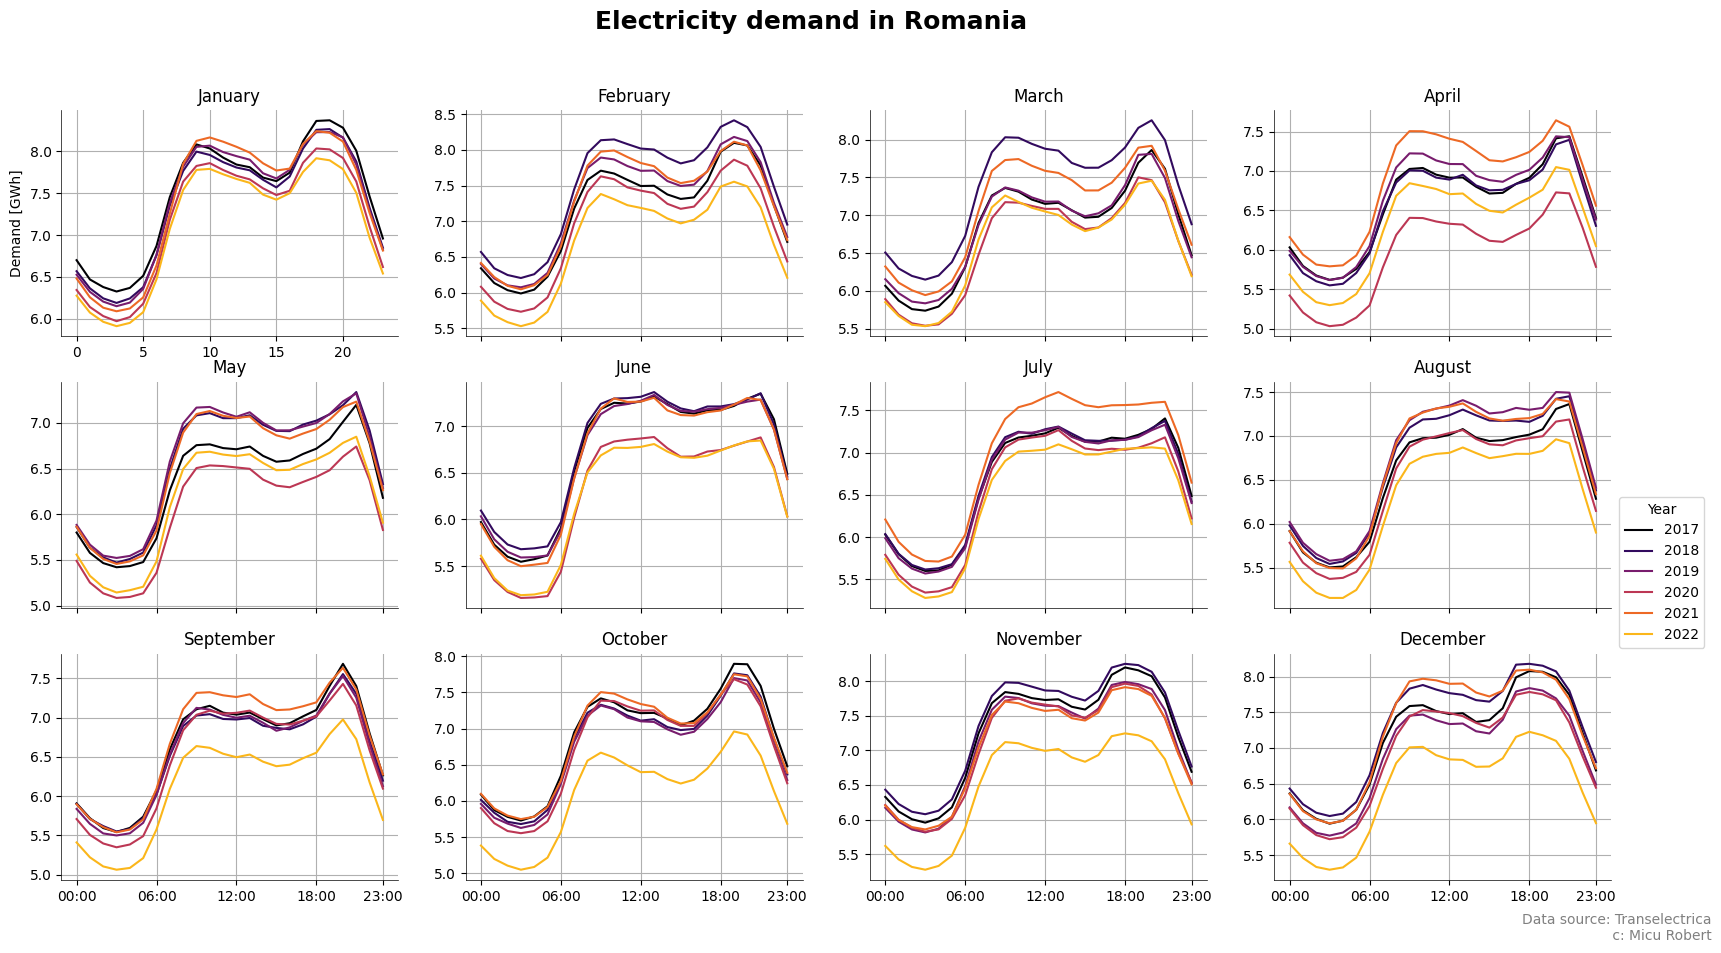

In [3]:
df = pd.read_excel('SEN_2017_2022.xlsx')
df = df.iloc[:,:2]
df.columns = ['timestamp', 'value']

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour

hourly_avg = df.groupby(['month', 'year', 'hour'])['value'].mean()
hourly_avg = hourly_avg.reset_index()

num_years = len(df['year'].unique())
cmap = mpl.colormaps.get_cmap('inferno')
colors = [cmap(i/num_years) for i in range(num_years)]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
fig.suptitle('Electricity demand in Romania', fontsize=18, fontweight='bold')

for i, month in enumerate(hourly_avg['month'].unique()):
    month_data = hourly_avg[hourly_avg['month'] == month]
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    for j, year in enumerate(month_data['year'].unique()):
        year_data = month_data[month_data['year'] == year]
        ax.plot(year_data['hour'], year_data['value']/1000, label=year, color=colors[j])
    
    if row == 0 and col == 0:
        ax.set_ylabel('Demand [GWh]')
    elif row == 2:
        ax.set_xticks([0, 6, 12, 18, 23])
        ax.set_xticklabels(['00:00', '06:00', '12:00', '18:00', '23:00'])
    else:
        ax.set_xticks([0, 6, 12, 18, 23])
        ax.set_xticklabels([])
    
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.set_title(f'{calendar.month_name[int(month)]}')

handles, labels = ax.get_legend_handles_labels()

fig.subplots_adjust(hspace=0.2)
fig.legend(handles, labels, title='Year', bbox_to_anchor=(0.95, 0.5))
plt.figtext(0.95, 0.05, 'Data source: Transelectrica\n c: Micu Robert', horizontalalignment='right', fontsize=10, color='gray')
fig.subplots_adjust(hspace=0.2)
fig.savefig('2017-2022-monthly-SEN.png')

